In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from constants import ROOT_DIR
import sys
import networkx as nx

# setting the path of this notebook to the root directory
sys.path.append(ROOT_DIR)
# import libraries custom in this repository
import methods.DataIO as DataIO
import methods.GromovWassersteinFramework as GWL
import dev.generate_util as Gen

In [2]:
cycle_g = nx.Graph(Gen.gen_cycle_graph(5))

In [3]:
def annot_heatmap(mat, title): 
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            text = ax.text(j, i, mat[i, j],
                    ha="center", va="center", color = "w")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [4]:
p_s, cost_s, _ = DataIO.extract_graph_info(cycle_g)
p_s /= np.sum(p_s); cost_s = cost_s + cost_s.T
p_t, cost_t, _ = DataIO.extract_graph_info(cycle_g)
p_t /= np.sum(p_t); cost_t = cost_t + cost_t.T

print("Probability Vector for Source:\n", p_s.T, "\n")
print("Adjacency Matrix for Source:\n", cost_s.toarray(), "\n")

print("Probability Vector for Target:\n", p_t.T, "\n")
print("Adjacency Matrix for Target:\n", cost_t.toarray())

Probability Vector for Source:
 [[0.2 0.2 0.2 0.2 0.2]] 

Adjacency Matrix for Source:
 [[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]] 

Probability Vector for Target:
 [[0.2 0.2 0.2 0.2 0.2]] 

Adjacency Matrix for Target:
 [[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]


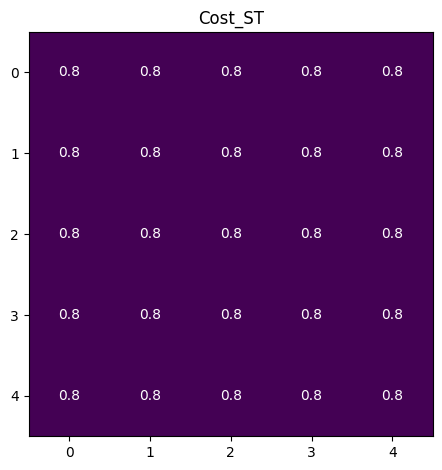

In [5]:
n_s = cost_s.shape[0]
n_t = cost_t.shape[0]

f1_st = np.repeat((cost_s.multiply(cost_s)) @ p_s, n_t, axis=1)
f2_st = np.repeat(((cost_t.multiply(cost_t)) @ p_t).T, n_s, axis=0)

cost_st = f1_st + f2_st

annot_heatmap(cost_st, "Cost_ST")

In [13]:
trans_init = p_s @ p_t.T
a = p_s

In [26]:
temp = (cost_st - 2 * cost_s @ trans_init @ cost_t.T)
trans, a = GWL.sinkhorn_knopp_iteration(cost=temp,
                                        p_s=p_s,
                                        p_t=p_t,
                                        a=a,
                                        trans0=None,
                                        beta=0.01,
                                        error_bound=1e-30,
                                        max_iter=10)

In [27]:
trans

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [ ]:
ot_hyperpara = {}

In [ ]:
cost = node_cost(cost_s, cost_t, trans0, cost_st, ot_hyperpara['loss_type'])
if ot_hyperpara['ot_method'] == 'proximal':
    trans, a = sinkhorn_knopp_iteration(cost=cost,
                                        p_s=p_s,
                                        p_t=p_t,
                                        a=a,
                                        trans0=trans0,
                                        beta=ot_hyperpara['beta'],
                                        error_bound=ot_hyperpara['sk_bound'],
                                        max_iter=ot_hyperpara['inner_iteration'])